In [46]:
from list_change import list_change
import pandas as pd
import numpy as np
import glob
from keras import Sequential
from keras.layers import LSTM, Dense
import copy
import matplotlib.pyplot as plt

In [ ]:
files = glob.glob('CutFrame_Output/output*/use2.txt')
data = [list_change(f) for f in files]

In [24]:
data=[]
for _dir in glob.glob('CutFrame_Output/output*/'):
    data.append([list_change(f) for f in glob.glob(_dir+'use*.txt')])
data = np.array(data)

In [26]:
len(data)

24

In [23]:
data[0]

array([[[  24., -351.],
        [  82., -386.],
        [ 162., -462.]],

       [[  18., -330.],
        [ -27., -297.],
        [  69., -407.]],

       [[  78., -350.],
        [ 139., -427.],
        [ 172., -458.]]])

In [5]:
# dataf = [pd.DataFrame(i,copy=True) for i in data]
# dataf

,0,1,2
0,"[78.0, -350.0]","[139.0, -427.0]","[172.0, -458.0]"
1,"[63.0, -341.0]","[118.0, -383.0]","[178.0, -450.0]"
2,"[27.0, -369.0]","[78.0, -424.0]","[144.0, -471.0]"
3,"[48.0, -354.0]","[99.0, -390.0]","[167.0, -470.0]"
4,"[9.0, -356.0]","[-37.0, -332.0]","[117.0, -445.0]"
5,"[72.0, -364.0]","[126.0, -390.0]","[173.0, -475.0]"
6,"[62.0, -347.0]","[109.0, -371.0]","[167.0, -470.0]"
7,"[51.0, -366.0]","[103.0, -397.0]","[160.0, -475.0]"
8,"[46.0, -360.0]","[101.0, -369.0]","[164.0, -473.0]"
9,"[59.0, -349.0]","[124.0, -392.0]","[168.0, -457.0]"


In [32]:
X = copy.deepcopy(data)
Y = copy.deepcopy(data)
X = [np.delete(X, -1, axis=1)]
Y = np.delete(Y, 0, axis=1)

In [34]:
X.shape

(24, 2, 3, 2)

In [43]:
l=[]
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[2], X.shape[3])))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
# history = model.fit(X, Y, epochs=100, batch_size=72, validation_data=(X, Y), verbose=1, shuffle=False)
for epoch in range(20):
    for x, y in zip(X, Y):
        loss = model.train_on_batch(x, y)
        l.append(loss)

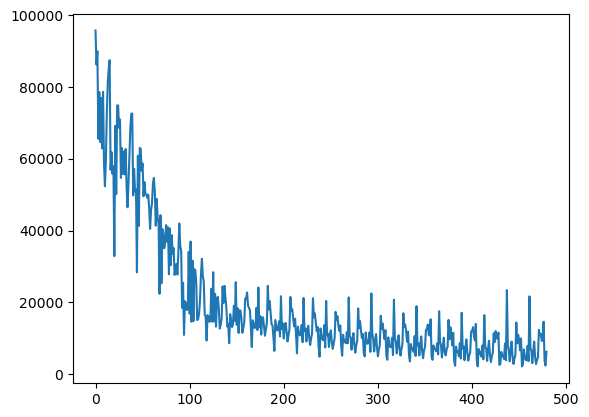

In [47]:
plt.plot(l)

In [ ]:
# model = Sequential()
# model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(data.shape()[1], data.shape[2])))